# 用柱形图进行对比分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as image

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：绿色，互补色：橙色
colors = {'蓝色':'#00589F', '靛蓝':'#065279', '石青':'#1685a9', '碧蓝':'#3eede7', '蔚蓝':'#70f3ff',
          '绿色':'#00A865', '油绿':'#00bc12', '石绿':'#16a951', '碧绿':'#2add9c', '草绿':'#40de5a',
          '橙色':'#F68F00', '橘黄':'#ff8936', '橘红':'#ff7500', '橙黄':'#ffa400', '赤金':'#f2be45'}

### 2. 定义数据

In [2]:
# 定义几个模拟的数据
df = pd.DataFrame({'产品':['产品 A', '产品 B', '产品 C'], '销售额':[66.6, 21.2, 13.5]})

# 画图用的数据定义
x = df['产品']
y = df['销售额']

# 平均值
avg = y.mean()

### 3. 开始画图

用「**面向对象**」的方法画图。

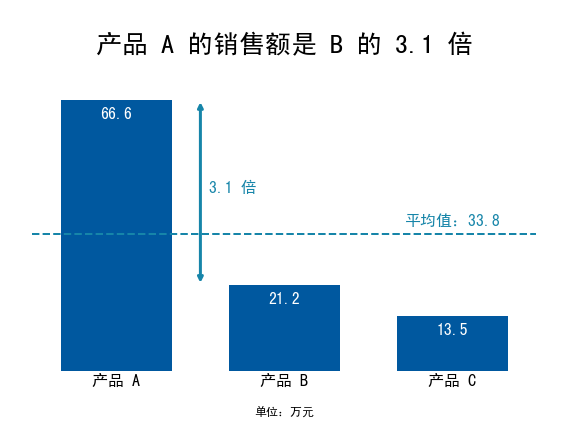

In [3]:
# 使用「面向对象」的方法画图
fig, ax = plt.subplots(figsize=(8, 6))

# 设置标题和坐标轴标签
ax.set_title("\n产品 A 的销售额是 B 的 3.1 倍\n", fontsize=26, verticalalignment='bottom')

# 画柱形图
ax.bar(x, y, width=0.66, color=colors['蓝色'])

# 平均值线
lc = ax.hlines(avg, -0.5, 2.5, color=colors['石青'], label='平均值', ls='--')
# 设置线条宽度
lc.set_linewidth(2)
# 文字标注平均值
ax.text(2, avg+2, "平均值：%.1f" % avg, fontsize=16, ha='center', color=colors['石青'])

# 用双箭头强调对比的关系
ax.annotate('', xy=(0.5, df.iloc[0, 1]), xytext=(0.5, df.iloc[1, 1]), arrowprops=dict(arrowstyle='<->', color=colors['石青'], lw=3))
# 文字标注两个柱形图的倍数关系
ax.text(0.55, y[:2].mean(), "%.1f 倍" % (y[0] / y[1]), fontsize=16, color=colors['石青'])

# 设置数据标签
for a, b in zip(x, y):
    plt.text(a, b-5, '%.1f' % b, ha='center', va= 'bottom', fontsize=16, color='w')

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 隐藏 X 轴的刻度线
ax.tick_params(axis='x', which='major', length=0)

# 隐藏 Y 轴刻度
ax.set_yticks([])
# 设置 X 轴标签
ax.set_xlabel('\n单位：万元', fontsize=12)

# 设置坐标标签字体大小
ax.tick_params(labelsize=16)

plt.show()